<a href="https://colab.research.google.com/github/yasssinemoumniii-lgtm/yassine-moumni/blob/main/Copie_de_projet_d'aide_%C3%A0_la_d%C3%A9cision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import io

# Télécharger le fichier depuis votre ordinateur
uploaded = files.upload()

Saving Mall_Customers (1).csv to Mall_Customers (1).csv


In [ ]:
# Lire le fichier (ajustez le nom du fichier et le format si nécessaire)
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers (1).csv']))

In [ ]:
print(df.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


/tmp/ipython-input-2670695109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


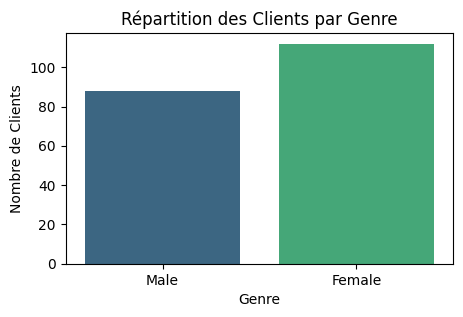

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
# Création du diagramme en barres
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Répartition des Clients par Genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de Clients')
plt.show()

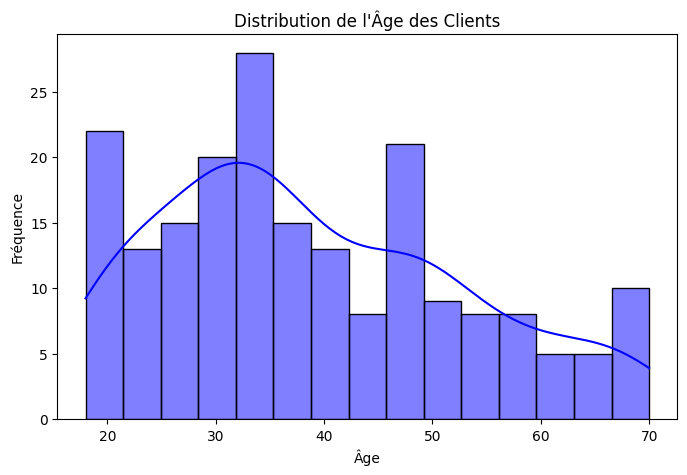

In [ ]:
plt.figure(figsize=(8, 5))
# kde=True ajoute une courbe d'estimation de densité
sns.histplot(df['Age'], bins=15, kde=True, color='blue')
plt.title('Distribution de l\'Âge des Clients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

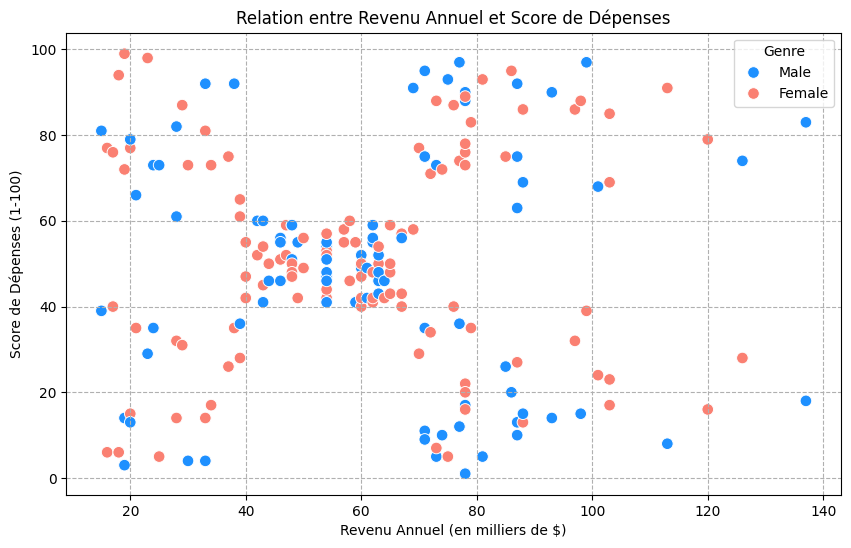

In [ ]:
plt.figure(figsize=(10, 6))
# Nuage de points, avec couleur (hue) basée sur le Gender pour plus de détail
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df,
    hue='Gender',
    palette={'Male': 'dodgerblue', 'Female': 'salmon'},
    s=70 # Taille des points
)
plt.title('Relation entre Revenu Annuel et Score de Dépenses')
plt.xlabel('Revenu Annuel (en milliers de $)')
plt.ylabel('Score de Dépenses (1-100)')
plt.legend(title='Genre')
plt.grid(True, linestyle='--')
plt.show()

In [ ]:
# Importation de la librairie nécessaire
from sklearn.model_selection import train_test_split

# 1. Définir les variables prédictives (X) et la variable cible (y)
# Exemple : Prédire le Score de Dépenses (y) en utilisant le Revenu Annuel (X)
X = df[['Annual Income (k$)']] # X est une colonne (ou plusieurs)
y = df['Spending Score (1-100)'] # y est la colonne cible

In [ ]:
# 2. Utilisation de la fonction train_test_split
# test_size=0.30 signifie que 30% des données iront à l'ensemble de test, et 70% à l'entraînement.
# random_state=42 assure que la séparation est la même à chaque exécution.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42
)

# Afficher les tailles des nouveaux ensembles pour vérifier
print(f"Taille de l'ensemble d'entraînement (X_train) : {X_train.shape[0]} lignes")
print(f"Taille de l'ensemble de test (X_test) : {X_test.shape[0]} lignes")

Taille de l'ensemble d'entraînement (X_train) : 140 lignes
Taille de l'ensemble de test (X_test) : 60 lignes


In [ ]:
import numpy as np

# Nous sélectionnons uniquement les deux colonnes d'intérêt pour le clustering
# Note : Nous n'avons pas besoin de séparer en train/test pour le clustering K-Means car c'est un apprentissage NON supervisé.
X_cluster = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

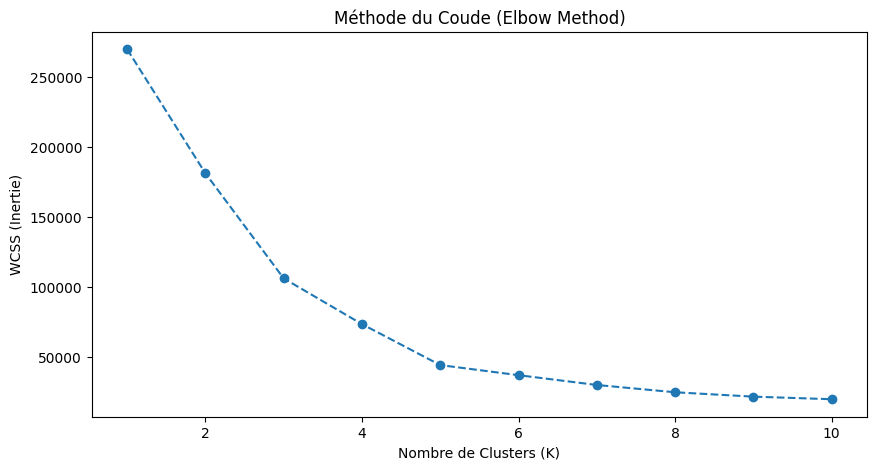

In [ ]:
from sklearn.cluster import KMeans

# Liste pour stocker la somme des carrés intra-cluster (WCSS)
wcss = []

# Tester K de 1 à 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_) # .inertia_ est le WCSS

# Visualisation pour trouver le 'coude'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude (Elbow Method)')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('WCSS (Inertie)')
plt.show()

In [ ]:
# Entraînement avec K=5 (basé sur le graphique du coude)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
# 'y_kmeans' contient l'étiquette de cluster (0, 1, 2, 3 ou 4) pour chaque client
y_kmeans = kmeans.fit_predict(X_cluster)

# Ajouter les étiquettes de cluster à votre DataFrame original
df['Cluster'] = y_kmeans

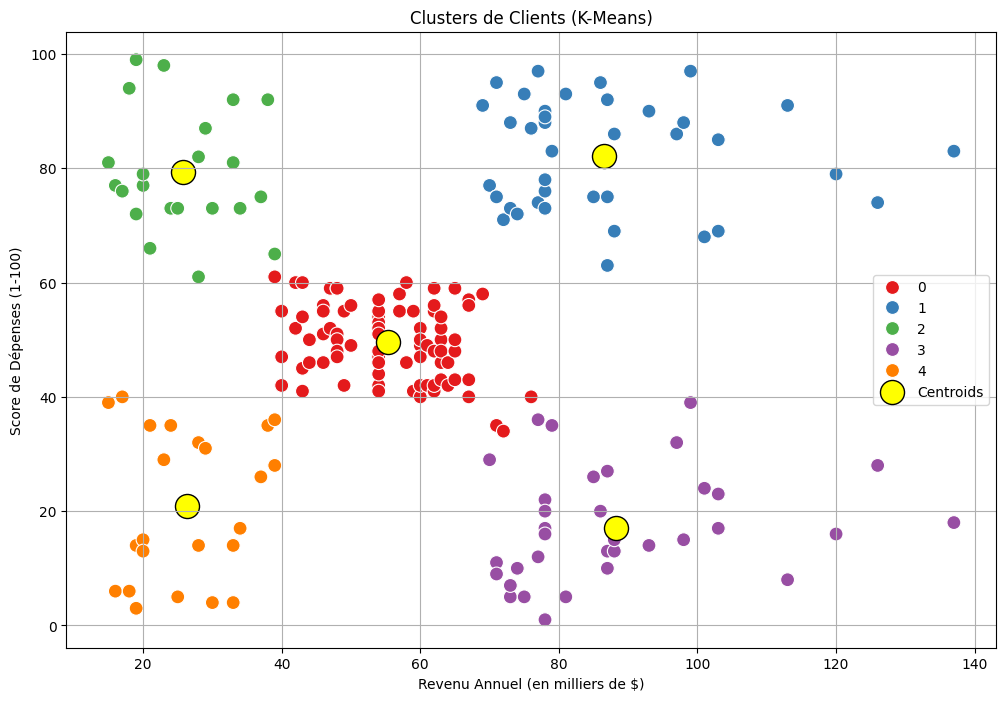

In [ ]:
plt.figure(figsize=(12, 8))
# Visualisation des 5 clusters (nous utilisons la colonne 'Cluster' que nous venons d'ajouter)
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df,
    hue='Cluster', # La couleur est donnée par le cluster
    palette='Set1', # Un jeu de couleurs distinct
    s=100
)

# Ajout des centres de clusters (les points centraux calculés par K-Means)
plt.scatter(
    kmeans.cluster_centers_[:, 0], # Coordonnée X (Revenu Annuel)
    kmeans.cluster_centers_[:, 1], # Coordonnée Y (Score de Dépenses)
    s=300, # Grosse taille
    c='yellow', # Couleur jaune
    label='Centroids', # Étiquette
    edgecolor='black'
)

plt.title('Clusters de Clients (K-Means)')
plt.xlabel('Revenu Annuel (en milliers de $)')
plt.ylabel('Score de Dépenses (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculer la moyenne de chaque colonne numérique par cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

print("--- Résumé des Caractéristiques Moyennes par Cluster ---")
print(cluster_summary.round(1))

--- Résumé des Caractéristiques Moyennes par Cluster ---
          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        42.7                55.3                    49.5
1        32.7                86.5                    82.1
2        25.3                25.7                    79.4
3        41.1                88.2                    17.1
4        45.2                26.3                    20.9


In [ ]:
!pip install ahpy
import ahpy

# --- 1. Définition des comparaisons (Exemple basé sur l'échelle de Saaty) ---
# Supposons 4 critères pour l'exemple :
# C1: Score Dépenses (Critère 1)
# C2: Revenu Annuel (Critère 2)
# C3: Taille Segment (Critère 3)
# C4: Âge Moyen (Critère 4)

criteria_comparisons = {
    ('C1', 'C2'): 3,   # C1 est 3 fois plus important que C2
    ('C1', 'C3'): 1/2, # C3 est 2 fois plus important que C1
    ('C1', 'C4'): 5,
    ('C2', 'C3'): 1/5,
    ('C2', 'C4'): 3,
    ('C3', 'C4'): 7
}

# --- 2. Créer l'objet AHP et calculer les poids ---
# L'objet s'appelle 'Critères'
criteria_ahp = ahpy.Compare(name='Critères', comparisons=criteria_comparisons, precision=3)

# --- 3. Correction de l'erreur : Utiliser .target_weights ---
print("Poids des Critères (AHP) :")
print(criteria_ahp.target_weights)

print("\nRatio de Cohérence (CR) :")
print(criteria_ahp.consistency_ratio)

Poids des Critères (AHP) :
{'C3': np.float64(0.523), 'C1': np.float64(0.298), 'C2': np.float64(0.122), 'C4': np.float64(0.057)}

Ratio de Cohérence (CR) :
0.028


In [ ]:
import pandas as pd
# En supposant que 'df' est toujours votre DataFrame original avec la colonne 'Cluster'
cluster_counts = df['Cluster'].value_counts().sort_index().to_dict()

print("--- Taille de chaque cluster (Critère C3) ---")
print(cluster_counts)

# Pour les autres critères, utilisez votre cluster_summary
# Exemple C1 (Score de Dépenses) :
# cluster_summary = df.groupby('Cluster')['Spending Score (1-100)'].mean().to_dict()

--- Taille de chaque cluster (Critère C3) ---
{0: 81, 1: 39, 2: 22, 3: 35, 4: 23}


In [ ]:
import ahpy

# Jugements basés sur l'approximation des ratios de taille
c3_comparisons = {
    ('Cluster 0', 'Cluster 1'): 2,
    ('Cluster 0', 'Cluster 2'): 4,
    ('Cluster 0', 'Cluster 3'): 2,
    ('Cluster 0', 'Cluster 4'): 4,
    ('Cluster 1', 'Cluster 2'): 2,
    ('Cluster 1', 'Cluster 3'): 1,
    ('Cluster 1', 'Cluster 4'): 2,
    ('Cluster 2', 'Cluster 3'): 1/2,
    ('Cluster 2', 'Cluster 4'): 1,
    ('Cluster 3', 'Cluster 4'): 2
}

# Calcul des priorités locales pour le Critère C3
c3_ahp = ahpy.Compare(name='Taille du Segment', comparisons=c3_comparisons, precision=3)

print("--- Priorités Locales pour C3 (Taille du Segment) ---")
print(c3_ahp.target_weights)
print(f"\nCR pour C3: {c3_ahp.consistency_ratio}")

--- Priorités Locales pour C3 (Taille du Segment) ---
{'Cluster 0': np.float64(0.4), 'Cluster 1': np.float64(0.2), 'Cluster 3': np.float64(0.2), 'Cluster 2': np.float64(0.1), 'Cluster 4': np.float64(0.1)}

CR pour C3: 0.0


In [ ]:
# Jugements basés sur la moyenne du Spending Score (C3 et C1 sont les meilleurs)
c1_comparisons = {
    ('Cluster 3', 'Cluster 1'): 1,
    ('Cluster 3', 'Cluster 4'): 2,
    ('Cluster 3', 'Cluster 0'): 4,
    ('Cluster 3', 'Cluster 2'): 4,
    ('Cluster 1', 'Cluster 4'): 2,
    ('Cluster 1', 'Cluster 0'): 4,
    ('Cluster 1', 'Cluster 2'): 4,
    ('Cluster 4', 'Cluster 0'): 2,
    ('Cluster 4', 'Cluster 2'): 2,
    ('Cluster 0', 'Cluster 2'): 1
}

c1_ahp = ahpy.Compare(name='Score de Dépenses', comparisons=c1_comparisons, precision=3)

print("\n--- Priorités Locales pour C1 (Score de Dépenses) ---")
print(c1_ahp.target_weights)
print(f"\nCR pour C1: {c1_ahp.consistency_ratio}")


--- Priorités Locales pour C1 (Score de Dépenses) ---
{'Cluster 3': np.float64(0.333), 'Cluster 1': np.float64(0.333), 'Cluster 4': np.float64(0.167), 'Cluster 0': np.float64(0.083), 'Cluster 2': np.float64(0.083)}

CR pour C1: 0.0


In [ ]:
# Jugements basés sur la moyenne du Revenu Annuel (C2 est le meilleur)
c2_comparisons = {
    ('Cluster 2', 'Cluster 3'): 2,
    ('Cluster 2', 'Cluster 1'): 3,
    ('Cluster 2', 'Cluster 4'): 4,
    ('Cluster 2', 'Cluster 0'): 5,
    ('Cluster 3', 'Cluster 1'): 2,
    ('Cluster 3', 'Cluster 4'): 3,
    ('Cluster 3', 'Cluster 0'): 4,
    ('Cluster 1', 'Cluster 4'): 2,
    ('Cluster 1', 'Cluster 0'): 3,
    ('Cluster 4', 'Cluster 0'): 2
}

c2_ahp = ahpy.Compare(name='Revenu Annuel', comparisons=c2_comparisons, precision=3)

print("\n--- Priorités Locales pour C2 (Revenu Annuel) ---")
print(c2_ahp.target_weights)
print(f"\nCR pour C2: {c2_ahp.consistency_ratio}")


--- Priorités Locales pour C2 (Revenu Annuel) ---
{'Cluster 2': np.float64(0.419), 'Cluster 3': np.float64(0.263), 'Cluster 1': np.float64(0.16), 'Cluster 4': np.float64(0.097), 'Cluster 0': np.float64(0.062)}

CR pour C2: 0.016


In [ ]:
# Jugements basés sur l'âge moyen (Les plus jeunes sont préférés : C3 puis C1)
c4_comparisons = {
    ('Cluster 3', 'Cluster 1'): 2,
    ('Cluster 3', 'Cluster 2'): 3,
    ('Cluster 3', 'Cluster 0'): 4,
    ('Cluster 3', 'Cluster 4'): 5,
    ('Cluster 1', 'Cluster 2'): 2,
    ('Cluster 1', 'Cluster 0'): 3,
    ('Cluster 1', 'Cluster 4'): 4,
    ('Cluster 2', 'Cluster 0'): 1,
    ('Cluster 2', 'Cluster 4'): 2,
    ('Cluster 0', 'Cluster 4'): 2
}

c4_ahp = ahpy.Compare(name='Âge Moyen', comparisons=c4_comparisons, precision=3)

print("\n--- Priorités Locales pour C4 (Âge Moyen) ---")
print(c4_ahp.target_weights)
print(f"\nCR pour C4: {c4_ahp.consistency_ratio}")


--- Priorités Locales pour C4 (Âge Moyen) ---
{'Cluster 3': np.float64(0.423), 'Cluster 1': np.float64(0.267), 'Cluster 2': np.float64(0.129), 'Cluster 0': np.float64(0.113), 'Cluster 4': np.float64(0.067)}

CR pour C4: 0.011


In [ ]:
# Poids Globaux (des Critères)
global_weights = {
    'C3': 0.523,  # Taille du Segment
    'C1': 0.298,  # Score de Dépenses
    'C2': 0.122,  # Revenu Annuel
    'C4': 0.057   # Âge Moyen
}

# Priorités Locales (des Clusters sur chaque Critère)
local_priorities = {
    'Cluster 0': {'C3': 0.400, 'C1': 0.083, 'C2': 0.062, 'C4': 0.113},
    'Cluster 1': {'C3': 0.200, 'C1': 0.333, 'C2': 0.160, 'C4': 0.267},
    'Cluster 2': {'C3': 0.100, 'C1': 0.083, 'C2': 0.419, 'C4': 0.129},
    'Cluster 3': {'C3': 0.200, 'C1': 0.333, 'C2': 0.263, 'C4': 0.423},
    'Cluster 4': {'C3': 0.100, 'C1': 0.167, 'C2': 0.097, 'C4': 0.067}
}

final_scores = {}
for cluster, priorities in local_priorities.items():
    score = (
        global_weights['C3'] * priorities['C3'] +
        global_weights['C1'] * priorities['C1'] +
        global_weights['C2'] * priorities['C2'] +
        global_weights['C4'] * priorities['C4']
    )
    final_scores[cluster] = round(score, 3)

# Classement final
sorted_scores = sorted(final_scores.items(), key=lambda item: item[1], reverse=True)

print("--- Résultat Final de l'AHP (Priorités Globales) ---")
for cluster, score in sorted_scores:
    print(f"{cluster}: {score * 100:.1f}%")

--- Résultat Final de l'AHP (Priorités Globales) ---
Cluster 3: 26.0%
Cluster 0: 24.8%
Cluster 1: 23.9%
Cluster 2: 13.6%
Cluster 4: 11.8%
